# Ensemble Machine Learning Model Creation

## Data Import

In [186]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

data_random= pd.read_csv('final_dataset_random_sampled.csv')
data_random.drop(data_random.columns[[0,1]], axis=1, inplace=True)
data_random.columns = data_random.columns.str.upper()
data_random=data_random.sort_index(axis=1)
data_random

data_coinbase= pd.read_csv('final_dataset_coinbase.csv')
data_coinbase.drop(data_coinbase.columns[[0,1]], axis=1, inplace=True)
data_coinbase.columns = data_coinbase.columns.str.upper()
data_coinbase=data_coinbase.sort_index(axis=1)
data_coinbase

,AVG_MIN_BETWEEN_RECEIVED_TNX,AVG_MIN_BETWEEN_SENT_TNX,AVG_VALUE_RECEIVED,AVG_VALUE_SENT,ERC20_AVG_TIME_BETWEEN_REC_TNX,ERC20_AVG_TIME_BETWEEN_SENT_TNX,ERC20_UNIQ_REC_ADDR,ERC20_UNIQ_SENT_ADDR,FLAG,MAX_VALUE_RECEIVED,...,RECIEVED_TNX,SENT_TNX,TIME_DIFF_BETWEEN_FIRST_AND_LAST_(MINS),TOTAL_ERC20_TNXS,TOTAL_ETHER_BALANCE,TOTAL_ETHER_RECEIVED,TOTAL_ETHER_SENT,TOTAL_TRANSACTIONS(INCLUDING_TNX_TO_CREATE_CONTRACT),UNIQUE_RECEIVED_FROM_ADDRESSES,UNIQUE_SENT_TO_ADDRESSES
0,7179.838889,2.246021,30.009950,0.000000,1.800229e+03,0.000000,207,1,0,100.000000,...,4,9996,22517.050000,315,37.708314,120.039800,0.000000,10000,4,1
1,0.000000,0.000000,0.012094,0.000000,0.000000e+00,0.000000,0,0,0,0.012094,...,1,0,0.000000,0,0.000000,0.012094,0.000000,1,1,0
2,0.000000,0.000000,0.028257,0.027851,0.000000e+00,0.000000,0,0,0,0.028257,...,1,1,0.200000,0,0.000000,0.028257,0.027851,2,1,1
3,0.000000,0.000000,0.001499,0.000000,1.200000e+00,0.000000,2,1,0,0.001499,...,1,1,2.000000,3,0.000843,0.001499,0.000000,2,1,1
4,0.000000,0.000000,0.057089,0.056683,0.000000e+00,0.000000,0,0,0,0.057089,...,1,1,0.200000,0,0.000000,0.057089,0.056683,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,318.741667,0.000000,0.412773,1.237457,1.924054e+06,0.000000,2,0,1,0.520000,...,3,1,19371.600000,2,0.000000,1.238318,1.237457,4,3,1
22540,0.000000,0.000000,0.002904,0.000000,2.400000e+01,0.000000,2,1,1,0.002904,...,1,1,0.200000,3,0.000218,0.002904,0.000000,2,1,1
22541,0.000000,0.000000,0.003687,0.000000,4.410000e+01,0.000000,2,1,1,0.003687,...,1,1,0.800000,4,0.000398,0.003687,0.000000,2,1,1
22542,0.000000,4.144444,0.501611,0.380111,3.458446e+05,4.161111,4,2,1,0.501611,...,1,13,93.333333,11,0.000000,0.501611,4.941441,14,1,7


In [187]:
X = data_random.drop('FLAG', axis=1)
Y = data_random['FLAG']
X_train, X_test, y_train, y_test = train_test_split(X,Y, random_state=1, test_size=0.30)

In [188]:
Xc = data_coinbase.drop('FLAG', axis=1)
Yc = data_coinbase['FLAG']
Xc_train, Xc_test, yc_train, yc_test = train_test_split(Xc,Yc, random_state=1, test_size=0.30)

In [189]:
results_random_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall'])
results_coinbase_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall'])

## Random Forest

##### Random Sampling

In [190]:
import time
start_time = time.time()
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [191]:
rfc_pred = rfc.predict(X_test)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Computation time: {elapsed_time:.2f} seconds")

rfc_pred

Computation time: 7.68 seconds


array([0, 0, 1, ..., 1, 1, 0], dtype=int64)

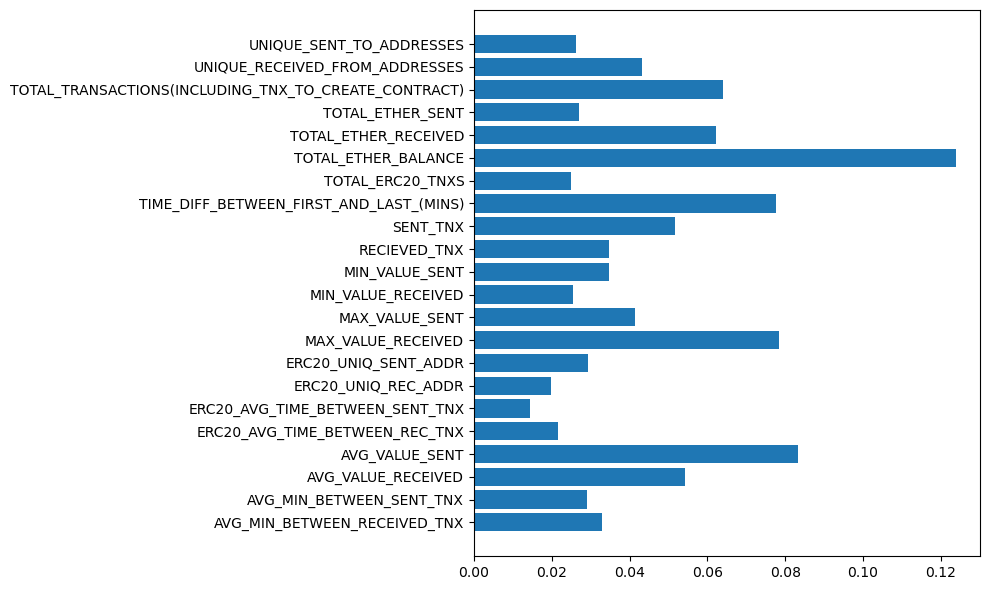

In [192]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6)) 
rfc.feature_importances_
plt.barh(X.columns, rfc.feature_importances_)
plt.tight_layout()

#Shaply Values
from shap import TreeExplainer
from shap import summary_plot

explainer = TreeExplainer(rfc)
shap_values = np.array(explainer.shap_values(X_train))


shap_values_ = shap_values.transpose((1,0,2))

np.allclose(
    rfc.predict_proba(X_train),
    shap_values_.sum(2) + explainer.expected_value
)

plt.figure(figsize=(3, 3))
#summary_plot(shap_values[0],X_train,plot_type="bar")

summary_plot(shap_values[0],X_train)

In [193]:
from sklearn.metrics import precision_recall_fscore_support,classification_report,confusion_matrix
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      4399
           1       0.96      0.91      0.93      3437

    accuracy                           0.94      7836
   macro avg       0.94      0.94      0.94      7836
weighted avg       0.94      0.94      0.94      7836



In [194]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

predicted_labels = rfc.predict(X_test)
true_labels = y_test
accuracy_rfc = accuracy_score(true_labels, predicted_labels)
precision_rfc = precision_score(true_labels, predicted_labels)
recall_rfc = recall_score(true_labels, predicted_labels)

In [195]:
import pandas as pd

results_list=[]
model_name = "Random Forest"
results_dict = {
    'Model': model_name,
    'Accuracy': accuracy_rfc,
    'Precision': precision_rfc,
    'Recall': recall_rfc
}

new_entry_df = pd.DataFrame([results_dict])

existing_rows = results_random_df[results_random_df['Model'] == model_name]

if not existing_rows.empty:
    results_random_df = results_random_df[results_random_df['Model'] != model_name]

results_random_df = pd.concat([results_random_df, new_entry_df], ignore_index=True)
results_random_df


,Model,Accuracy,Precision,Recall
0,Random Forest,0.941041,0.95727,0.906023


### Coinbase

In [202]:
import time
start_time = time.time()
from sklearn.ensemble import RandomForestClassifier
rfcc = RandomForestClassifier(n_estimators=100)
rfcc.fit(Xc_train, yc_train)

RandomForestClassifier()

In [203]:
rfcc_pred = rfcc.predict(Xc_test)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Computation time: {elapsed_time:.2f} seconds")

rfcc_pred

Computation time: 5.56 seconds


array([1, 0, 1, ..., 1, 0, 0], dtype=int64)

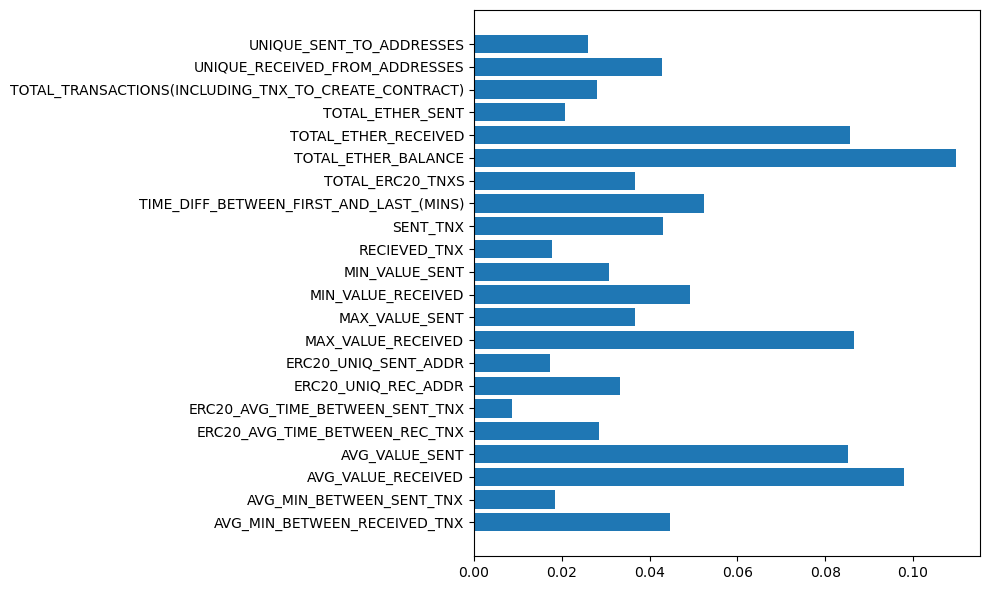

In [204]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6)) 
rfcc.feature_importances_
plt.barh(Xc.columns, rfcc.feature_importances_)
plt.tight_layout()

#Shaply Values
from shap import TreeExplainer
from shap import summary_plot

explainer = TreeExplainer(rfcc)
shap_values = np.array(explainer.shap_values(Xc_train))


shap_values_ = shap_values.transpose((1,0,2))

np.allclose(
    rfcc.predict_proba(Xc_train),
    shap_values_.sum(2) + explainer.expected_value
)

plt.figure(figsize=(3, 3))
#summary_plot(shap_values[0],X_train,plot_type="bar")

summary_plot(shap_values[0],Xc_train)

In [205]:
from sklearn.metrics import precision_recall_fscore_support,classification_report,confusion_matrix
print(classification_report(yc_test,rfcc_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      3352
           1       0.98      0.97      0.97      3412

    accuracy                           0.97      6764
   macro avg       0.97      0.97      0.97      6764
weighted avg       0.97      0.97      0.97      6764



In [206]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

predicted_labels_c = rfcc.predict(Xc_test)
true_labels_c = yc_test
accuracy_rfcc = accuracy_score(true_labels_c, predicted_labels_c)
precision_rfcc = precision_score(true_labels_c, predicted_labels_c)
recall_rfcc = recall_score(true_labels_c, predicted_labels_c)

In [207]:
import pandas as pd

results_list_c=[]
model_name = "Random Forest"
results_dict = {
    'Model': model_name,
    'Accuracy': accuracy_rfcc,
    'Precision': precision_rfcc,
    'Recall': recall_rfcc
}

new_entry_df = pd.DataFrame([results_dict])

existing_rows = results_coinbase_df[results_coinbase_df['Model'] == model_name]

if not existing_rows.empty:
    results_coinbase_df = results_coinbase_df[results_coinbase_df['Model'] != model_name]

results_coinbase_df = pd.concat([results_coinbase_df, new_entry_df], ignore_index=True)
results_coinbase_df

,Model,Accuracy,Precision,Recall
0,Random Forest,0.972501,0.977501,0.967761


## DNN Model

#### Random Sampling

In [208]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import tensorflow as tf
import shap
from eli5.sklearn import PermutationImportance

DNN_model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

DNN_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy','mean_squared_error'])

In [209]:
history # Train the DNN model
DNN_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.3, verbose=2)

# Predict using the trained model
y_pred = DNN_model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate training accuracy
y_train_pred = DNN_model.predict(X_train)
y_train_pred_binary = (y_train_pred > 0.5).astype(int)
train_accuracy_dnn = accuracy_score(y_train, y_train_pred_binary)

# Evaluate the model
test_accuracy_dnn = accuracy_score(y_test, y_pred_binary)
conf_matrix = confusion_matrix(y_test, y_pred_binary)
class_report = classification_report(y_test, y_pred_binary)
precision_dnn = precision_score(y_test, y_pred_binary)
recall_dnn = recall_score(y_test, y_pred_binary)

print("Training Accuracy:", train_accuracy_dnn * 100)
print("Test Accuracy:", test_accuracy_dnn * 100)
print("Confusion Matrix:\n", conf_matrix)
#print("Classification Report:\n", class_report)= dnn_model.fit(X_train, y_train, epochs=200, batch_size=20, validation_data= (X_test, y_test))

Epoch 1/10
400/400 - 3s - loss: 1457.4729 - accuracy: 0.7241 - mean_squared_error: 0.2498 - val_loss: 450.3101 - val_accuracy: 0.6416 - val_mean_squared_error: 0.3168 - 3s/epoch - 7ms/step
Epoch 2/10
400/400 - 1s - loss: 734.1050 - accuracy: 0.7471 - mean_squared_error: 0.2241 - val_loss: 346.6829 - val_accuracy: 0.7076 - val_mean_squared_error: 0.2586 - 1s/epoch - 3ms/step
Epoch 3/10
400/400 - 1s - loss: 423.5444 - accuracy: 0.7514 - mean_squared_error: 0.2156 - val_loss: 257.1612 - val_accuracy: 0.7256 - val_mean_squared_error: 0.2392 - 1s/epoch - 3ms/step
Epoch 4/10
400/400 - 1s - loss: 476.7970 - accuracy: 0.7584 - mean_squared_error: 0.2157 - val_loss: 306.9187 - val_accuracy: 0.7912 - val_mean_squared_error: 0.1937 - 1s/epoch - 3ms/step
Epoch 5/10
400/400 - 1s - loss: 346.2243 - accuracy: 0.7773 - mean_squared_error: 0.2066 - val_loss: 468.9038 - val_accuracy: 0.7974 - val_mean_squared_error: 0.1897 - 1s/epoch - 3ms/step
Epoch 6/10
400/400 - 1s - loss: 275.1324 - accuracy: 0.7879

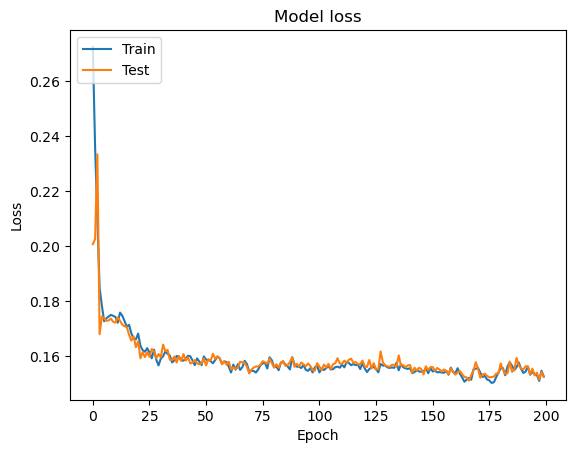

In [210]:
import matplotlib.pyplot as plt
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

In [211]:
import pandas as pd

results_list=[]
model_name = "DNN Model"
results_dict = {
    'Model': model_name,
    'Accuracy': test_accuracy_dnn,
    'Precision': precision_dnn,
    'Recall': recall_dnn
}

new_entry_df = pd.DataFrame([results_dict])

existing_rows = results_random_df[results_random_df['Model'] == model_name]

if not existing_rows.empty:
    results_random_df = results_random_df[results_random_df['Model'] != model_name]

results_random_df = pd.concat([results_random_df, new_entry_df], ignore_index=True)
results_random_df


,Model,Accuracy,Precision,Recall
0,Random Forest,0.941041,0.957270,0.906023
1,DNN Model,0.708525,0.610293,0.928135


#### Coinbase

In [212]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import tensorflow as tf
import shap
from eli5.sklearn import PermutationImportance

DNN_modelc = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(Xc_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

DNN_modelc.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy','mean_squared_error'])

In [213]:
history
DNN_modelc.fit(Xc_train, yc_train, epochs=10, batch_size=32, validation_split=0.3, verbose=2)

# Predict using the trained model
yc_pred = DNN_model.predict(Xc_test)
yc_pred_binary = (yc_pred > 0.5).astype(int)

# Calculate training accuracy
yc_train_pred = DNN_modelc.predict(Xc_train)
yc_train_pred_binary = (yc_train_pred > 0.5).astype(int)
train_accuracyc_dnn = accuracy_score(yc_train, yc_train_pred_binary)

# Evaluate the model
test_accuracyc_dnn = accuracy_score(yc_test, yc_pred_binary)
conf_matrixc_dnn = confusion_matrix(yc_test, yc_pred_binary)
class_reportc_dnn = classification_report(yc_test, yc_pred_binary)
precisionc_dnn = precision_score(yc_test, yc_pred_binary)
recallc_dnn = recall_score(yc_test, yc_pred_binary)

print("Training Accuracy:", train_accuracyc_dnn * 100)
print("Test Accuracy:", test_accuracyc_dnn * 100)
print("Confusion Matrix:\n", conf_matrixc_dnn)
#print("Classification Report:\n", class_report)= dnn_model.fit(X_train, y_train, epochs=200, batch_size=20, validation_data= (X_test, y_test))

Epoch 1/10
346/346 - 3s - loss: 824.0392 - accuracy: 0.7457 - mean_squared_error: 0.2413 - val_loss: 312.4652 - val_accuracy: 0.7455 - val_mean_squared_error: 0.2424 - 3s/epoch - 8ms/step
Epoch 2/10
346/346 - 1s - loss: 457.9547 - accuracy: 0.7705 - mean_squared_error: 0.2163 - val_loss: 202.2030 - val_accuracy: 0.7537 - val_mean_squared_error: 0.2364 - 1s/epoch - 3ms/step
Epoch 3/10
346/346 - 1s - loss: 357.3501 - accuracy: 0.7884 - mean_squared_error: 0.2034 - val_loss: 283.2267 - val_accuracy: 0.8080 - val_mean_squared_error: 0.1830 - 1s/epoch - 3ms/step
Epoch 4/10
346/346 - 1s - loss: 410.9486 - accuracy: 0.7947 - mean_squared_error: 0.1968 - val_loss: 217.2398 - val_accuracy: 0.8236 - val_mean_squared_error: 0.1651 - 983ms/epoch - 3ms/step
Epoch 5/10
346/346 - 1s - loss: 274.7339 - accuracy: 0.8035 - mean_squared_error: 0.1855 - val_loss: 337.9720 - val_accuracy: 0.8112 - val_mean_squared_error: 0.1786 - 1s/epoch - 3ms/step
Epoch 6/10
346/346 - 1s - loss: 288.7338 - accuracy: 0.80

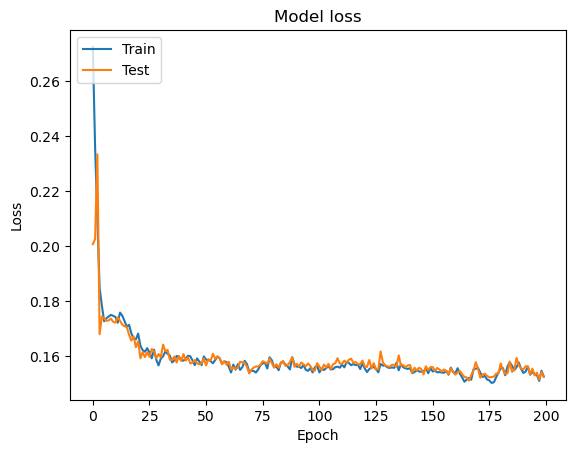

In [214]:
import matplotlib.pyplot as plt
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

In [215]:
import pandas as pd

results_list=[]
model_name = "DNN Model"
results_dict = {
    'Model': model_name,
    'Accuracy': test_accuracyc_dnn,
    'Precision': precisionc_dnn,
    'Recall': recallc_dnn
}

new_entry_df = pd.DataFrame([results_dict])

existing_rows = results_coinbase_df[results_random_df['Model'] == model_name]

if not existing_rows.empty:
    results_coinbase_df = results_coinbase_df[results_coinbase_df['Model'] != model_name]

results_coinbase_df = pd.concat([results_coinbase_df, new_entry_df], ignore_index=True)
results_coinbase_df


Boolean Series key will be reindexed to match DataFrame index.


,Model,Accuracy,Precision,Recall
0,Random Forest,0.972501,0.977501,0.967761
1,DNN Model,0.709196,0.646285,0.935522


## Decision Trees

##### Random Sampling

In [216]:
#Model creation
import time
start_time = time.time()

from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [217]:
#Prediction & Evaluation
dtree_pred = dtree.predict(X_test)
dtree_pred

array([0, 0, 1, ..., 1, 1, 0], dtype=int64)

In [218]:
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Computation time: {elapsed_time:.2f} seconds")

Computation time: 3.20 seconds


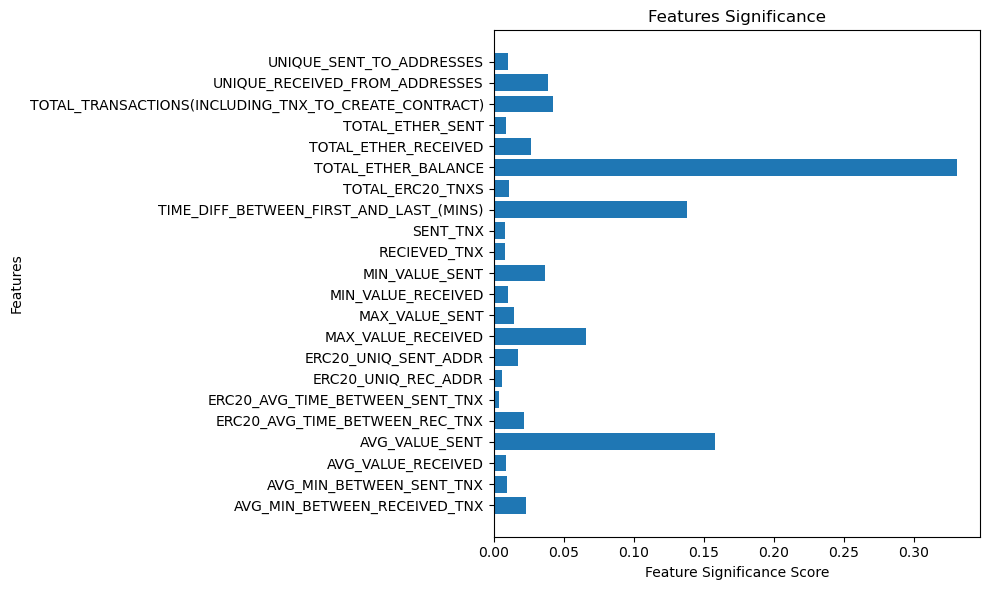

In [219]:
#Feature Importance
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6)) 
dtree.feature_importances_
plt.barh(X.columns, dtree.feature_importances_)
plt.xlabel('Feature Significance Score')
plt.ylabel('Features')
plt.title('Features Significance')
plt.tight_layout()
plt.show()

import shap

explainer = shap.TreeExplainer(dtree)
shap_values = explainer.shap_values(X_train)
plt.figure(figsize=(3, 3))
shap.summary_plot(shap_values, X_train, plot_type="bar")

In [220]:
from sklearn.metrics import precision_recall_fscore_support,classification_report,confusion_matrix
print(classification_report(y_test,dtree_pred))
print(confusion_matrix(y_test,dtree_pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      4399
           1       0.90      0.89      0.90      3437

    accuracy                           0.91      7836
   macro avg       0.91      0.91      0.91      7836
weighted avg       0.91      0.91      0.91      7836

[[4062  337]
 [ 374 3063]]


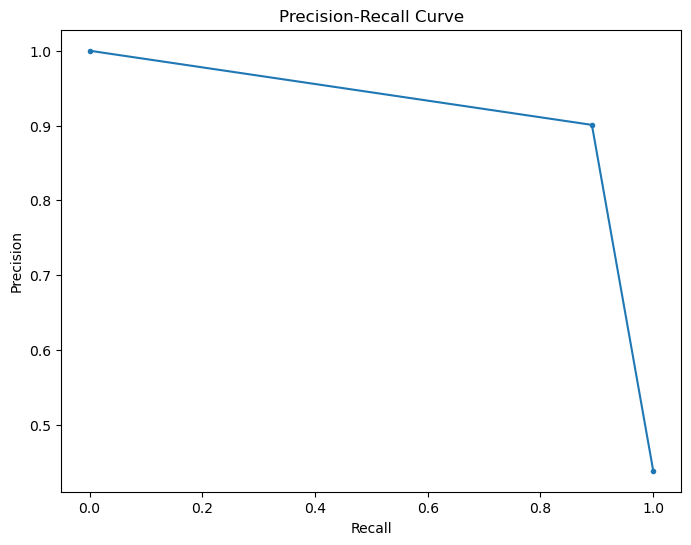

In [221]:
#Precision-Recall Curve
from sklearn.metrics import precision_recall_curve
precision, recall, _ = precision_recall_curve(y_test, dtree_pred)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


In [222]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

predicted_labels = dtree.predict(X_test)
true_labels = y_test
accuracy_dtree = accuracy_score(true_labels, predicted_labels)
precision_dtree = precision_score(true_labels, predicted_labels)
recall_dtree = recall_score(true_labels, predicted_labels)

In [223]:
import pandas as pd

model_name = "Decision Trees"
results_dict = {
    'Model': model_name,
    'Accuracy': accuracy_dtree,
    'Precision': precision_dtree,
    'Recall': recall_dtree
}

new_entry_df = pd.DataFrame([results_dict])

existing_rows = results_random_df[results_random_df['Model'] == model_name]

if not existing_rows.empty:
    results_random_df = results_random_df[results_random_df['Model'] != model_name]

results_random_df = pd.concat([results_random_df, new_entry_df], ignore_index=True)
results_random_df

,Model,Accuracy,Precision,Recall
0,Random Forest,0.941041,0.957270,0.906023
1,DNN Model,0.708525,0.610293,0.928135
2,Decision Trees,0.909265,0.900882,0.891184


##### Coinbase

In [224]:
#Model creation
import time
start_time = time.time()

from sklearn.tree import DecisionTreeClassifier
dtreec = DecisionTreeClassifier()
dtreec.fit(Xc_train,yc_train)

DecisionTreeClassifier()

In [225]:
#Prediction & Evaluation
dtree_predc = dtreec.predict(Xc_test)
dtree_predc

array([1, 1, 1, ..., 1, 0, 0], dtype=int64)

In [226]:
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Computation time: {elapsed_time:.2f} seconds")

Computation time: 0.92 seconds


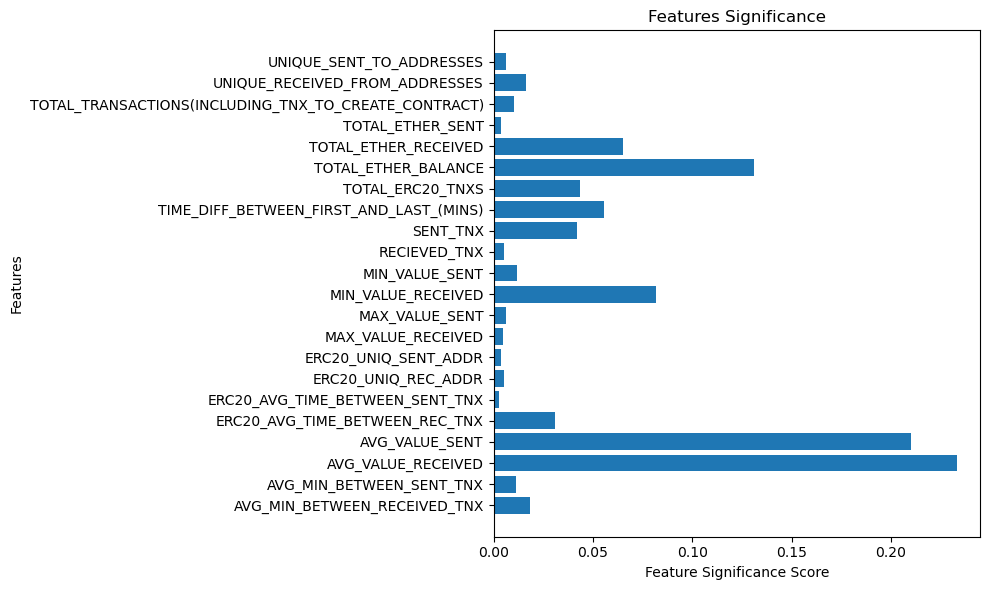

In [227]:
#Feature Importance
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6)) 
dtreec.feature_importances_
plt.barh(Xc.columns, dtreec.feature_importances_)
plt.xlabel('Feature Significance Score')
plt.ylabel('Features')
plt.title('Features Significance')
plt.tight_layout()
plt.show()

import shap

explainer = shap.TreeExplainer(dtree)
shap_values = explainer.shap_values(Xc_train)
plt.figure(figsize=(3, 3))
shap.summary_plot(shap_values, Xc_train, plot_type="bar")

In [228]:
from sklearn.metrics import precision_recall_fscore_support,classification_report,confusion_matrix
print(classification_report(yc_test,dtree_predc))
print(confusion_matrix(yc_test,dtree_predc))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      3352
           1       0.94      0.96      0.95      3412

    accuracy                           0.95      6764
   macro avg       0.95      0.95      0.95      6764
weighted avg       0.95      0.95      0.95      6764

[[3157  195]
 [ 146 3266]]


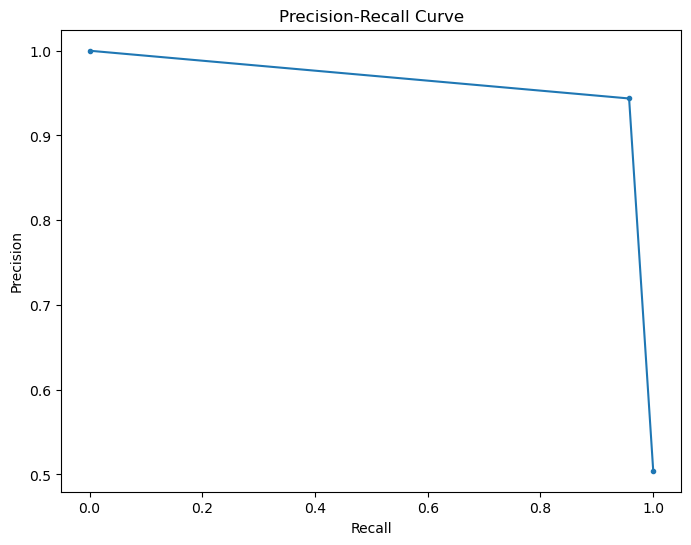

In [229]:
#Precision-Recall Curve
from sklearn.metrics import precision_recall_curve
precision, recall, _ = precision_recall_curve(yc_test, dtree_predc)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


In [230]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

predictedc_labels = dtreec.predict(Xc_test)
truec_labels = yc_test
accuracyc_dtree = accuracy_score(truec_labels, predictedc_labels)
precisionc_dtree = precision_score(truec_labels, predictedc_labels)
recallc_dtree = recall_score(truec_labels, predictedc_labels)

In [231]:
import pandas as pd

model_name = "Decision Trees"
results_dict = {
    'Model': model_name,
    'Accuracy': accuracyc_dtree,
    'Precision': precisionc_dtree,
    'Recall': recallc_dtree
}

new_entry_df = pd.DataFrame([results_dict])

existing_rows = results_coinbase_df[results_coinbase_df['Model'] == model_name]

if not existing_rows.empty:
    results_coinbase_df = results_coinbase_df[results_coinbase_df['Model'] != model_name]

results_coinbase_df = pd.concat([results_coinbase_df, new_entry_df], ignore_index=True)
results_coinbase_df

,Model,Accuracy,Precision,Recall
0,Random Forest,0.972501,0.977501,0.967761
1,DNN Model,0.709196,0.646285,0.935522
2,Decision Trees,0.949586,0.943658,0.957210


## Gradient Boost

#### Random sampling

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   9.3s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   7.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   7.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=  14.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=  13.9s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=  13.8s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=300; total time=  20.5s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=300; total time=  21.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=300; total time=  20.9s
[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=100; total time=   9.1s
[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=100; total time=   8.9s
[CV] END ..learning_rate=0.01, max_depth=4, n_es

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


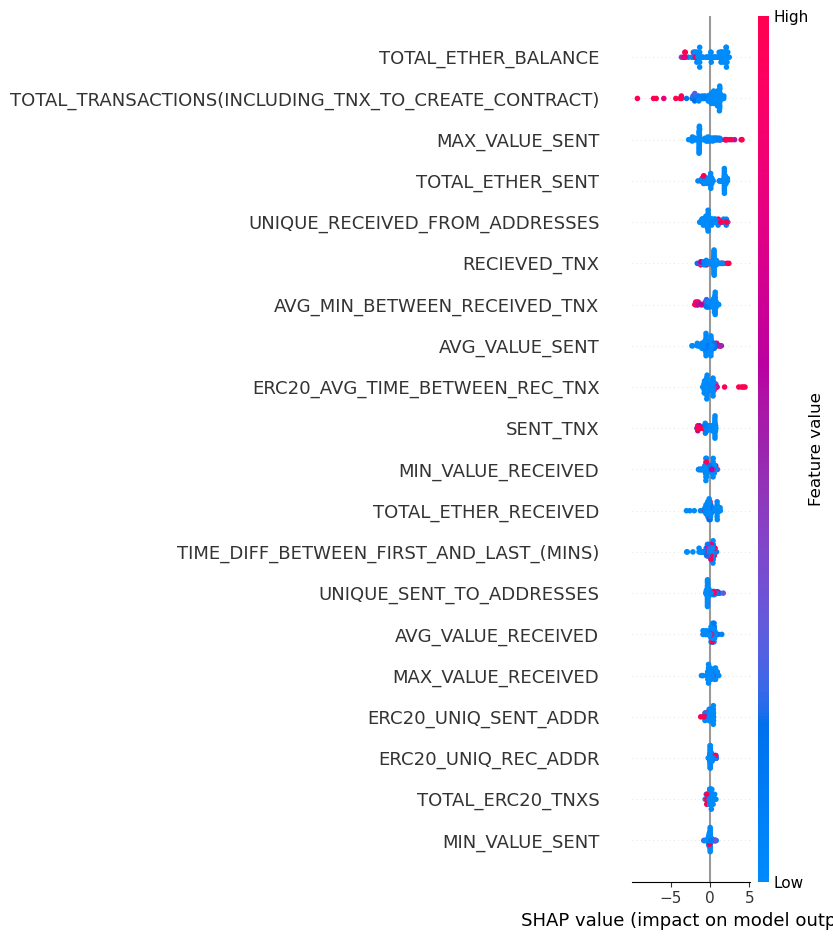

In [232]:
from sklearn.model_selection import  GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
#from eli5.sklearn import PermutationImportance

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
}

# Create a Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=gb_classifier, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters
best_gradientboost_params = grid_search.best_params_
print("Best Hyperparameters:", best_gradientboost_params)

# Train a model with the best hyperparameters
best_gb_model = GradientBoostingClassifier(**best_gradientboost_params, random_state=42)
best_gb_model.fit(X_train, y_train)

# Predict using the best model
y_pred = best_gb_model.predict(X_test)

# Calculate training accuracy
y_train_pred = best_gb_model.predict(X_train)  # Predictions on the training set
train_accuracy = np.sum(y_train_pred == y_train) / len(y_train)

# Evaluate the model
test_accuracy_gb = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Training Accuracy:", train_accuracy * 100)
print("Test Accuracy:", test_accuracy_gb * 100)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

# Create a SHAP explainer for the Gradient Boosting model
explainer = shap.TreeExplainer(best_gb_model)

# Calculate SHAP values for a subset of your test data (adjust as needed)
shap_values = explainer.shap_values(X_test.iloc[:100])

# Plot summary plot to visualize feature importance
shap.summary_plot(shap_values, X_test.iloc[:100], feature_names=X.columns)

# Create a PermutationImportance object for Gradient Boosting
#perm_importance = PermutationImportance(best_gb_model, random_state=42).fit(X_test, y_test)

# Display feature importance scores using ELI5
#eli5.show_weights(perm_importance, feature_names=X.columns.tolist())


In [233]:
# Import necessary metrics from sklearn
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Predict using the best Gradient Boosting model
y_pred_gb = best_gb_model.predict(X_test)

# Calculate accuracy, precision, and recall
accuracy_gb = accuracy_score(y_test, y_pred_gb)
precision_gb = precision_score(y_test, y_pred_gb)
recall_gb = recall_score(y_test, y_pred_gb)


In [234]:
import pandas as pd

model_name = "Gradient Boosting"
results_dict = {
    'Model': model_name,
    'Accuracy': accuracy_gb,
    'Precision': precision_gb,
    'Recall': recall_gb
}

new_entry_df = pd.DataFrame([results_dict])

existing_rows = results_random_df[results_random_df['Model'] == model_name]

if not existing_rows.empty:
    results_random_df = results_random_df[results_random_df['Model'] != model_name]

results_random_df = pd.concat([results_random_df, new_entry_df], ignore_index=True)
results_random_df

,Model,Accuracy,Precision,Recall
0,Random Forest,0.941041,0.957270,0.906023
1,DNN Model,0.708525,0.610293,0.928135
2,Decision Trees,0.909265,0.900882,0.891184
3,Gradient Boosting,0.945253,0.954381,0.919116


### Coinbase

In [268]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
#import eli5
#from eli5.sklearn import PermutationImportance


# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
}

# Create a Gradient Boosting classifier
gbc_classifier = GradientBoostingClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=gbc_classifier, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2)

# Fit the model
grid_search.fit(Xc_train, yc_train)

# Get the best parameters
best_gradientboost_params = grid_search.best_params_
print("Best Hyperparameters:", best_gradientboost_params)

# Train a model with the best hyperparameters
best_gbc_model = GradientBoostingClassifier(**best_gradientboost_params, random_state=42)
best_gbc_model.fit(Xc_train, yc_train)

# Predict using the best model
yc_pred = best_gb_model.predict(Xc_test)

# Calculate training accuracy
yc_train_pred = best_gb_model.predict(Xc_train)  # Predictions on the training set
train_accuracy = np.sum(yc_train_pred == yc_train) / len(yc_train)

# Evaluate the model
test_accuracy = accuracy_score(yc_test, yc_pred)
conf_matrix = confusion_matrix(yc_test, yc_pred)
class_report = classification_report(yc_test, yc_pred)

print("Training Accuracy:", train_accuracy * 100)
print("Test Accuracy:", test_accuracy * 100)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

# Create a SHAP explainer for the Gradient Boosting model
#explainer = shap.TreeExplainer(best_gb_model)

# Calculate SHAP values for a subset of your test data (adjust as needed)
#shap_values = explainer.shap_values(Xc_test.iloc[:100])

# Plot summary plot to visualize feature importance
#shap.summary_plot(shap_values, Xc_test.iloc[:100], feature_names=Xc.columns)

# Create a PermutationImportance object for Gradient Boosting
#perm_importance = PermutationImportance(best_gb_model, random_state=42).fit(Xc_test, yc_test)

# Display feature importance scores using ELI5
#eli5.show_weights(perm_importance, feature_names=Xc.columns.tolist())


Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   5.2s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   5.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   5.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=  10.2s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=  10.2s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=  10.3s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=300; total time=  15.4s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=300; total time=  15.7s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=300; total time=  15.7s
[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=100; total time=   6.6s
[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=100; total time=   6.7s
[CV] END ..learning_rate=0.01, max_depth=4, n_es

In [269]:
# Import necessary metrics from sklearn
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Predict using the best Gradient Boosting model
yc_pred_gb = best_gbc_model.predict(Xc_test)

# Calculate accuracy, precision, and recall
accuracyc_gb = accuracy_score(yc_test, yc_pred_gb)
precisionc_gb = precision_score(yc_test, yc_pred_gb)
recallc_gb = recall_score(yc_test, yc_pred_gb)

In [270]:
import pandas as pd

model_name = "Gradient Boost"
results_dict = {
    'Model': model_name,
    'Accuracy': accuracyc_gb,
    'Precision': precisionc_gb,
    'Recall': recallc_gb
}

new_entry_df = pd.DataFrame([results_dict])

existing_rows = results_coinbase_df[results_coinbase_df['Model'] == model_name]

if not existing_rows.empty:
    results_coinbase_df = results_coinbase_df[results_coinbase_df['Model'] != model_name]

results_coinbase_df = pd.concat([results_coinbase_df, new_entry_df], ignore_index=True)
results_coinbase_df

,Model,Accuracy,Precision,Recall
0,Random Forest,0.972501,0.977501,0.967761
1,DNN Model,0.709196,0.646285,0.935522
2,Decision Trees,0.949586,0.943658,0.957210
3,XGBoost,0.974571,0.978441,0.970985
4,ADABoost,0.939237,0.908466,0.846087
5,Logistic Regression,0.690568,0.797315,0.345650
6,Balanced Bagging Classifier,0.966750,0.977464,0.955360
7,Gradient Boost,0.973048,0.981465,0.964170


## XGBoost

#### Random sampling

In [117]:
from sklearn.model_selection import  GridSearchCV
import xgboost as xgb
# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100,200,300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
}

# Create an XGBoost classifier
xgb_classifier = xgb.XGBClassifier(random_state=1)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters
best_xgboost_params = grid_search.best_params_
print("Best Hyperparameters:", best_xgboost_params)

# Train a model with the best hyperparameters
best_xgb_model = xgb.XGBClassifier(**best_xgboost_params, random_state=42)
best_xgb_model.fit(X_train, y_train)

# Predict using the best model
y_pred = best_xgb_model.predict(X_test)


# Calculate training accuracy
y_train_pred = best_xgb_model.predict(X_train)  # Predictions on the training set
train_accuracy_xg = np.sum(y_train_pred == y_train) / len(y_train)

# Evaluate the model
test_accuracy_xg = accuracy_score(y_test, y_pred)
conf_matrix_xg = confusion_matrix(y_test, y_pred)
class_report_xg = classification_report(y_test, y_pred)

print("Training Accuracy:", train_accuracy_xg * 100)
print("Test Accuracy:", test_accuracy_xg * 100)
print("Confusion Matrix:\n", conf_matrix_xg)
print("Classification Report:\n", class_report_xg)


Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.3s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.4s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.4s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.8s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.9s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.9s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=300; total time=   1.3s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=300; total time=   1.3s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=300; total time=   1.3s
[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=100; total time=   0.5s
[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=100; total time=   0.5s
[CV] END ..learning_rate=0.01, max_depth=4, n_es

In [ ]:
# Create a SHAP explainer for the XGBoost model
explainer = shap.TreeExplainer(best_xgb_model)

# Calculate SHAP values for a subset of your test data (adjust as needed)
shap_values = explainer.shap_values(X_test.iloc[:100])

# Plot summary plot to visualize feature importance
shap.summary_plot(shap_values, X_test.iloc[:100], feature_names=X.columns)


In [ ]:
# Create a PermutationImportance object
perm_importance = PermutationImportance(best_xgb_model, random_state=42).fit(X_test, y_test)

# Display feature importance scores using ELI5
eli5.show_weights(perm_importance, feature_names=X.columns.tolist()) 


In [ ]:
shap_values = explainer(X_test)

# Compute ELI5 importance scores
#perm = PermutationImportance(model, random_state=1).fit(X_test, y_test)
eli5_scores = perm_importance .feature_importances_

# Create a DataFrame to compare SHAP values and ELI5 scores
feature_names = X_test.columns  # Use your actual feature names
comparison_df = pd.DataFrame({
    'Feature': feature_names,
    'SHAP Value': np.abs(shap_values.values).mean(axis=0),
    'ELI5 Score': eli5_scores
})

# Sort the DataFrame by SHAP values
comparison_df = comparison_df.sort_values(by='SHAP Value', ascending=False)

print(comparison_df)


In [238]:
# Import necessary metrics from sklearn
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Predict using the best Gradient Boosting model
y_pred_xgb = best_xgb_model.predict(X_test)

# Calculate accuracy, precision, and recall
accuracy_xgb = accuracy_score(y_test, y_pred_gb)
precision_xgb = precision_score(y_test, y_pred_gb)
recall_xgb = recall_score(y_test, y_pred_gb)


In [239]:
import pandas as pd

model_name = "XGBoosting"
results_dict = {
    'Model': model_name,
    'Accuracy': accuracy_xgb,
    'Precision': precision_xgb,
    'Recall': recall_xgb
}

new_entry_df = pd.DataFrame([results_dict])

existing_rows = results_random_df[results_random_df['Model'] == model_name]

if not existing_rows.empty:
    results_random_df = results_random_df[results_random_df['Model'] != model_name]

results_random_df = pd.concat([results_random_df, new_entry_df], ignore_index=True)
results_random_df

,Model,Accuracy,Precision,Recall
0,Random Forest,0.941041,0.957270,0.906023
1,DNN Model,0.708525,0.610293,0.928135
2,Decision Trees,0.909265,0.900882,0.891184
3,Gradient Boosting,0.945253,0.954381,0.919116
4,XGBoosting,0.945253,0.954381,0.919116


### Coinbase

In [271]:

from sklearn.model_selection import  GridSearchCV
import xgboost as xgb
# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100,200,300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
}

# Create an XGBoost classifier
xgbc_classifier = xgb.XGBClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2)

# Fit the model
grid_search.fit(Xc_train, yc_train)

# Get the best parameters
best_xgboostc_params = grid_search.best_params_
print("Best Hyperparameters:", best_xgboostc_params)

# Train a model with the best hyperparameters
best_xgbc_model = xgb.XGBClassifier(**best_xgboostc_params, random_state=42)
best_xgbc_model.fit(Xc_train, yc_train)

# Predict using the best model
yc_pred = best_xgbc_model.predict(Xc_test)


# Calculate training accuracy
yc_train_pred = best_xgbc_model.predict(Xc_train)  # Predictions on the training set
train_accuracy_xgbc = np.sum(yc_train_pred == yc_train) / len(yc_train)

# Evaluate the model
test_accuracy_xgbc = accuracy_score(yc_test, yc_pred)
conf_matrix_xgbc = confusion_matrix(yc_test, yc_pred)
class_report_xgbc = classification_report(yc_test, yc_pred)

print("Training Accuracy:", train_accuracy_xgbc * 100)
print("Test Accuracy:", test_accuracy_xgbc * 100)
print("Confusion Matrix:\n", conf_matrix_xgbc)
print("Classification Report:\n", class_report_xgbc)


Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.3s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.3s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.3s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.6s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.6s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.6s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=300; total time=   0.9s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=300; total time=   0.9s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=300; total time=   1.0s
[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=100; total time=   0.4s
[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=100; total time=   0.4s
[CV] END ..learning_rate=0.01, max_depth=4, n_es

In [ ]:
# Create a SHAP explainer for the XGBoost model
explainer = shap.TreeExplainer(best_xgb_model)

# Calculate SHAP values for a subset of your test data (adjust as needed)
shap_values = explainer.shap_values(Xc_test.iloc[:100])

# Plot summary plot to visualize feature importance
shap.summary_plot(shap_values, Xc_test.iloc[:100], feature_names=Xc.columns)


In [ ]:
# Create a PermutationImportance object
perm_importance = PermutationImportance(best_xgb_model, random_state=42).fit(Xc_test, yc_test)

# Display feature importance scores using ELI5
eli5.show_weights(perm_importance, feature_names=Xc.columns.tolist()) 


In [ ]:
#comparision between shap and eli5

shap_values = explainer(Xc_test)

# Compute ELI5 importance scores
#perm = PermutationImportance(model, random_state=1).fit(X_test, y_test)
eli5_scores = perm_importance .feature_importances_

# Create a DataFrame to compare SHAP values and ELI5 scores
feature_names = Xc_test.columns  # Use your actual feature names
comparison_df = pd.DataFrame({
    'Feature': feature_names,
    'SHAP Value': np.abs(shap_values.values).mean(axis=0),
    'ELI5 Score': eli5_scores
})

# Sort the DataFrame by SHAP values
comparison_df = comparison_df.sort_values(by='SHAP Value', ascending=False)

print(comparison_df)


In [241]:
# Import necessary metrics from sklearn
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Predict using the best Gradient Boosting model
yc_pred_xgb = best_xgb_model.predict(Xc_test)

# Calculate accuracy, precision, and recall
accuracyc_xgb = accuracy_score(yc_test, yc_pred_gb)
precisionc_xgb = precision_score(yc_test, yc_pred_gb)
recallc_xgb = recall_score(yc_test, yc_pred_gb)


In [242]:
import pandas as pd

model_name = "XGBoost"
results_dict = {
    'Model': model_name,
    'Accuracy': accuracyc_xgb,
    'Precision': precisionc_xgb,
    'Recall': recallc_xgb
}

new_entry_df = pd.DataFrame([results_dict])

existing_rows = results_coinbase_df[results_coinbase_df['Model'] == model_name]

if not existing_rows.empty:
    results_coinbase_df = results_coinbase_df[results_coinbase_df['Model'] != model_name]

results_coinbase_df = pd.concat([results_coinbase_df, new_entry_df], ignore_index=True)
results_coinbase_df

,Model,Accuracy,Precision,Recall
0,Random Forest,0.972501,0.977501,0.967761
1,DNN Model,0.709196,0.646285,0.935522
2,Decision Trees,0.949586,0.943658,0.957210
3,Gradient Boost,0.974571,0.978441,0.970985
4,XGBoost,0.974571,0.978441,0.970985


## ADABOOST

##### Random sampling

In [243]:

from sklearn.ensemble import AdaBoostClassifier
#from eli5.sklearn import PermutationImportance
from sklearn.base import is_classifier

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
}

# Create an AdaBoost classifier
adaboost_classifier = AdaBoostClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=adaboost_classifier, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters
best_adaboost_params = grid_search.best_params_
print("Best Hyperparameters:", best_adaboost_params)

# Train a model with the best hyperparameters
best_adaboost_model = AdaBoostClassifier(**best_adaboost_params, random_state=42)
best_adaboost_model.fit(X_train, y_train)

# Predict using the best model
y_pred_ada = best_adaboost_model.predict(X_test)

# Calculate training accuracy
y_train_pred_ada = best_adaboost_model.predict(X_train)  # Predictions on the training set
train_accuracy_ada = np.sum(y_train_pred_ada == y_train) / len(y_train)

# Evaluate the model
test_accuracy_ada = accuracy_score(y_test, y_pred_ada)
conf_matrix_ada = confusion_matrix(y_test, y_pred_ada)
class_report_ada = classification_report(y_test, y_pred_ada)
precision_ada = precision_score(y_test, y_pred_ada)
recall_ada = recall_score(y_test, y_pred_ada)

print("Training Accuracy:", train_accuracy_ada * 100)
print("Test Accuracy:", test_accuracy_ada * 100)
print("Confusion Matrix:\n", conf_matrix_ada)
print("Classification Report:\n", class_report_ada)


Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] END ................learning_rate=0.01, n_estimators=50; total time=   1.2s
[CV] END ................learning_rate=0.01, n_estimators=50; total time=   1.1s
[CV] END ................learning_rate=0.01, n_estimators=50; total time=   1.1s
[CV] END ...............learning_rate=0.01, n_estimators=100; total time=   2.4s
[CV] END ...............learning_rate=0.01, n_estimators=100; total time=   2.3s
[CV] END ...............learning_rate=0.01, n_estimators=100; total time=   2.4s
[CV] END ...............learning_rate=0.01, n_estimators=200; total time=   4.9s
[CV] END ...............learning_rate=0.01, n_estimators=200; total time=   4.8s
[CV] END ...............learning_rate=0.01, n_estimators=200; total time=   4.8s
[CV] END .................learning_rate=0.1, n_estimators=50; total time=   1.1s
[CV] END .................learning_rate=0.1, n_estimators=50; total time=   1.1s
[CV] END .................learning_rate=0.1, n_es

In [244]:
import pandas as pd

model_name = "ADA Boost"
results_dict = {
    'Model': model_name,
    'Accuracy': test_accuracy_ada,
    'Precision': precision_ada,
    'Recall': recall_ada
}

new_entry_df = pd.DataFrame([results_dict])

existing_rows = results_random_df[results_random_df['Model'] == model_name]

if not existing_rows.empty:
    results_coinbase_df = results_random_df[results_random_df['Model'] != model_name]

results_random_df = pd.concat([results_random_df, new_entry_df], ignore_index=True)
results_random_df

,Model,Accuracy,Precision,Recall
0,Random Forest,0.941041,0.957270,0.906023
1,DNN Model,0.708525,0.610293,0.928135
2,Decision Trees,0.909265,0.900882,0.891184
3,Gradient Boosting,0.945253,0.954381,0.919116
4,XGBoosting,0.945253,0.954381,0.919116
5,ADA Boost,0.895100,0.908466,0.846087


#### Coinbase

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
#from eli5.sklearn import PermutationImportance
from sklearn.base import is_classifier

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
}

# Create an AdaBoost classifier
adaboostc_classifier = AdaBoostClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=adaboost_classifier, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2)

# Fit the model
grid_search.fit(Xc_train, yc_train)

# Get the best parameters
best_adaboost_params = grid_search.best_params_
print("Best Hyperparameters:", best_adaboost_params)

# Train a model with the best hyperparameters
best_adaboostc_model = AdaBoostClassifier(**best_adaboost_params, random_state=42)
best_adaboostc_model.fit(Xc_train, yc_train)

# Predict using the best model
yc_pred = best_adaboostc_model.predict(Xc_test)

# Calculate training accuracy
yc_train_pred = best_adaboostc_model.predict(Xc_train)  # Predictions on the training set
train_accuracy = np.sum(yc_train_pred == yc_train) / len(yc_train)

# Evaluate the model
test_accuracyc_ada = accuracy_score(yc_test, yc_pred)
conf_matrixc_ada = confusion_matrix(yc_test, yc_pred)
class_reportc_ada = classification_report(yc_test, yc_pred)
precisionc_ada = precision_score(y_test, y_pred_ada)
recallc_ada = recall_score(y_test, y_pred_ada)

print("Training Accuracy:", train_accuracy * 100)
print("Test Accuracy:", test_accuracy * 100)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


In [246]:
import pandas as pd

model_name = "ADA Boost"
results_dict = {
    'Model': model_name,
    'Accuracy': test_accuracyc_ada,
    'Precision': precisionc_ada,
    'Recall': recallc_ada
}

new_entry_df = pd.DataFrame([results_dict])

existing_rows = results_coinbase_df[results_coinbase_df['Model'] == model_name]

if not existing_rows.empty:
    results_coinbase_df = results_coinbase_df[results_coinbase_df['Model'] != model_name]

results_coinbase_df = pd.concat([results_coinbase_df, new_entry_df], ignore_index=True)
results_coinbase_df

,Model,Accuracy,Precision,Recall
0,Random Forest,0.972501,0.977501,0.967761
1,DNN Model,0.709196,0.646285,0.935522
2,Decision Trees,0.949586,0.943658,0.957210
3,Gradient Boost,0.974571,0.978441,0.970985
4,XGBoost,0.974571,0.978441,0.970985
5,ADABoost,0.939237,0.908466,0.846087


## Logistic Regression

##### Random Sampling

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] END ................................C=0.001, penalty=l1; total time=   0.0s
[CV] END ................................C=0.001, penalty=l1; total time=   0.0s
[CV] END ................................C=0.001, penalty=l1; total time=   0.0s
[CV] END ................................C=0.001, penalty=l2; total time=   5.4s
[CV] END ................................C=0.001, penalty=l2; total time=   1.5s
[CV] END ................................C=0.001, penalty=l2; total time=   7.7s
[CV] END .................................C=0.01, penalty=l1; total time=   0.0s
[CV] END .................................C=0.01, penalty=l1; total time=   0.0s
[CV] END .................................C=0.01, penalty=l1; total time=   0.0s
[CV] END .................................C=0.01, penalty=l2; total time=   2.2s
[CV] END .................................C=0.01, penalty=l2; total time=   1.8s
[CV] END .................................C=0.01


18 fits failed out of a total of 36.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ayush\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ayush\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\ayush\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

One or more of the test scor

Best Hyperparameters: {'C': 100, 'penalty': 'l2'}
Training Accuracy: 67.58560332567552
Test Accuracy: 67.44512506380806
Confusion Matrix:
 [[4097  302]
 [2249 1188]]
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.93      0.76      4399
           1       0.80      0.35      0.48      3437

    accuracy                           0.67      7836
   macro avg       0.72      0.64      0.62      7836
weighted avg       0.71      0.67      0.64      7836



No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


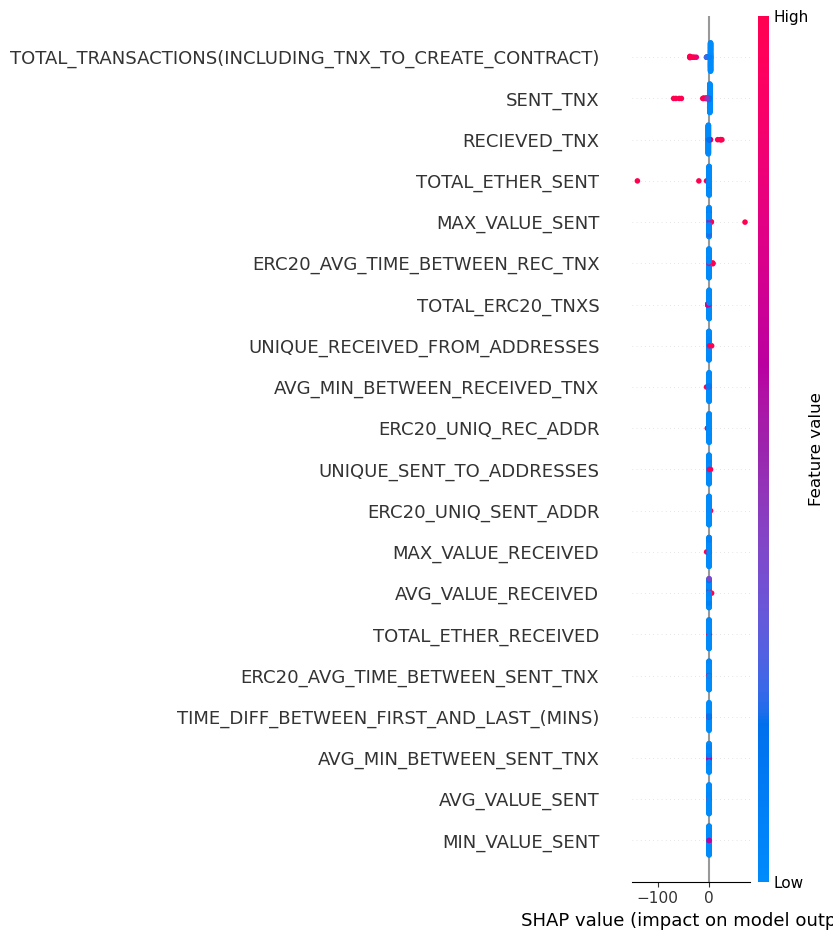

In [247]:

from sklearn.linear_model import LogisticRegression
# Define the parameter grid for GridSearchCV
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
}

# Create a Logistic Regression classifier
logistic_regression = LogisticRegression(random_state=42, max_iter=10000)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=logistic_regression, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters
best_logistic_params = grid_search.best_params_
print("Best Hyperparameters:", best_logistic_params)

# Train a model with the best hyperparameters
best_logistic_model = LogisticRegression(**best_logistic_params, random_state=42, max_iter=10000)
best_logistic_model.fit(X_train, y_train)

# Predict using the best model
y_pred = best_logistic_model.predict(X_test)

# Calculate training accuracy
y_train_pred = best_logistic_model.predict(X_train)  # Predictions on the training set
train_accuracy_lr = np.sum(y_train_pred == y_train) / len(y_train)

# Evaluate the model
test_accuracy_lr = accuracy_score(y_test, y_pred)
conf_matrix_lr = confusion_matrix(y_test, y_pred)
class_report_lr = classification_report(y_test, y_pred)
precision_lr = precision_score(y_test, y_pred)
recall_lr = recall_score(y_test, y_pred)

print("Training Accuracy:", train_accuracy_lr * 100)
print("Test Accuracy:", test_accuracy_lr * 100)
print("Confusion Matrix:\n", conf_matrix_lr)
print("Classification Report:\n", class_report_lr)

# Create a SHAP explainer for the Logistic Regression model
explainer = shap.Explainer(best_logistic_model, X_train)

# Calculate SHAP values for a subset of your test data (adjust as needed)
shap_values = explainer.shap_values(X_test.iloc[:100])

# Plot summary plot to visualize feature importance
shap.summary_plot(shap_values, X_test.iloc[:100], feature_names=X.columns)


In [ ]:

# Create a PermutationImportance object for Logistic Regression
perm_importance = PermutationImportance(best_logistic_model, random_state=42).fit(X_test, y_test)

# Display feature importance scores using ELI5
eli5.show_weights(perm_importance, feature_names=X.columns.tolist())


In [248]:
import pandas as pd

model_name = "Logistic Regression"
results_dict = {
    'Model': model_name,
    'Accuracy': test_accuracy_lr,
    'Precision': precision_lr,
    'Recall': recall_lr
}

new_entry_df = pd.DataFrame([results_dict])

existing_rows = results_random_df[results_random_df['Model'] == model_name]

if not existing_rows.empty:
    results_coinbase_df = results_random_df[results_random_df['Model'] != model_name]

results_random_df = pd.concat([results_random_df, new_entry_df], ignore_index=True)
results_random_df

,Model,Accuracy,Precision,Recall
0,Random Forest,0.941041,0.957270,0.906023
1,DNN Model,0.708525,0.610293,0.928135
2,Decision Trees,0.909265,0.900882,0.891184
3,Gradient Boosting,0.945253,0.954381,0.919116
4,XGBoosting,0.945253,0.954381,0.919116
5,ADA Boost,0.895100,0.908466,0.846087
6,Logistic Regression,0.674451,0.797315,0.345650


### Coinbase

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] END ................................C=0.001, penalty=l1; total time=   0.0s
[CV] END ................................C=0.001, penalty=l1; total time=   0.0s
[CV] END ................................C=0.001, penalty=l1; total time=   0.0s
[CV] END ................................C=0.001, penalty=l2; total time=   1.3s
[CV] END ................................C=0.001, penalty=l2; total time=   1.5s
[CV] END ................................C=0.001, penalty=l2; total time=   0.0s
[CV] END .................................C=0.01, penalty=l1; total time=   0.0s
[CV] END .................................C=0.01, penalty=l1; total time=   0.0s
[CV] END .................................C=0.01, penalty=l1; total time=   0.0s
[CV] END .................................C=0.01, penalty=l2; total time=   1.4s
[CV] END .................................C=0.01, penalty=l2; total time=   0.4s
[CV] END .................................C=0.01


18 fits failed out of a total of 36.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ayush\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ayush\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\ayush\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

One or more of the test scor

Best Hyperparameters: {'C': 0.001, 'penalty': 'l2'}
Training Accuracy: 69.68314321926489
Test Accuracy: 69.0567711413365
Confusion Matrix:
 [[1518 1834]
 [ 259 3153]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.45      0.59      3352
           1       0.63      0.92      0.75      3412

    accuracy                           0.69      6764
   macro avg       0.74      0.69      0.67      6764
weighted avg       0.74      0.69      0.67      6764



No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


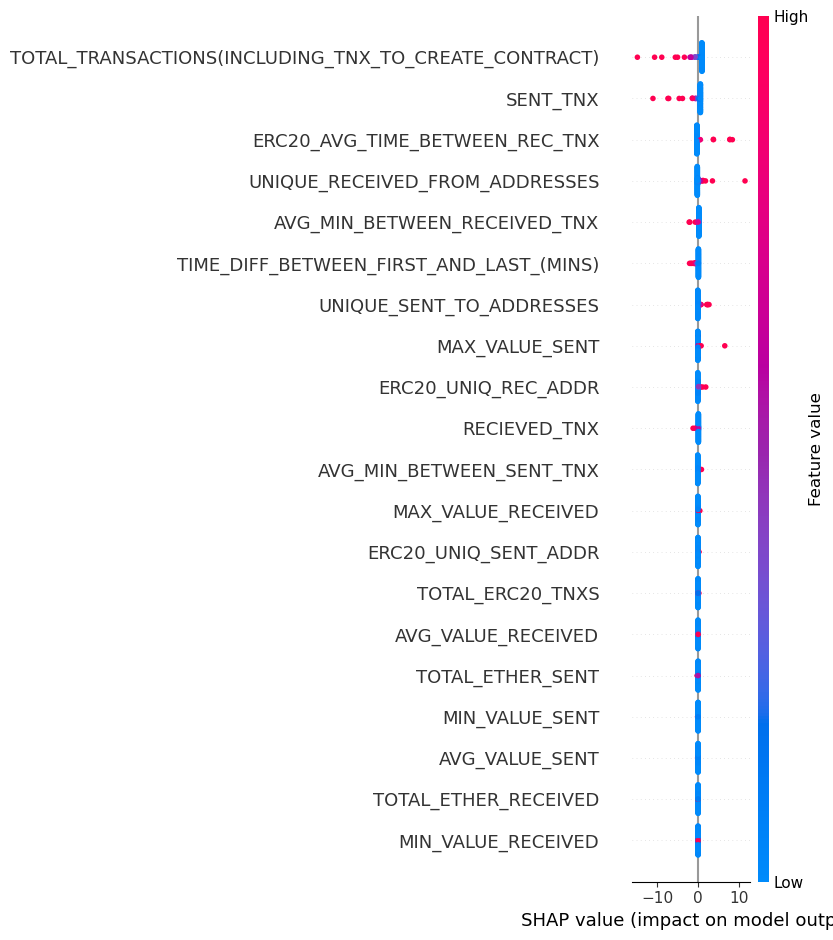

In [249]:

from sklearn.linear_model import LogisticRegression
# Define the parameter grid for GridSearchCV
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
}

# Create a Logistic Regression classifier
logistic_regression = LogisticRegression(random_state=42, max_iter=10000)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=logistic_regression, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2)

# Fit the model
grid_search.fit(Xc_train, yc_train)

# Get the best parameters
best_logistic_params = grid_search.best_params_
print("Best Hyperparameters:", best_logistic_params)

# Train a model with the best hyperparameters
best_logistic_model = LogisticRegression(**best_logistic_params, random_state=42, max_iter=10000)
best_logistic_model.fit(Xc_train, yc_train)

# Predict using the best model
yc_pred = best_logistic_model.predict(Xc_test)

# Calculate training accuracy
yc_train_pred = best_logistic_model.predict(Xc_train)  # Predictions on the training set
train_accuracyc_lr = np.sum(yc_train_pred == yc_train) / len(yc_train)

# Evaluate the model
test_accuracyc_lr = accuracy_score(yc_test, yc_pred)
conf_matrixc_lr = confusion_matrix(yc_test, yc_pred)
class_reportc_lr = classification_report(yc_test, yc_pred)
precisionc_lr = precision_score(y_test, y_pred)
recallc_lr = recall_score(y_test, y_pred)

print("Training Accuracy:", train_accuracyc_lr * 100)
print("Test Accuracy:", test_accuracyc_lr * 100)
print("Confusion Matrix:\n", conf_matrixc_lr)
print("Classification Report:\n", class_reportc_lr)

# Create a SHAP explainer for the Logistic Regression model
explainer = shap.Explainer(best_logistic_model, Xc_train)

# Calculate SHAP values for a subset of your test data (adjust as needed)
shap_values = explainer.shap_values(Xc_test.iloc[:100])

# Plot summary plot to visualize feature importance
shap.summary_plot(shap_values, Xc_test.iloc[:100], feature_names=Xc.columns)



#Create a PermutationImportance object for Logistic Regression
perm_importance = PermutationImportance(best_logistic_model, random_state=42).fit(Xc_test, yc_test)

#Display feature importance scores using ELI5
eli5.show_weights(perm_importance, feature_names=Xc.columns.tolist())

In [250]:
import pandas as pd

model_name = "Logistic Regression"
results_dict = {
    'Model': model_name,
    'Accuracy': test_accuracyc_lr,
    'Precision': precisionc_lr,
    'Recall': recallc_lr
}

new_entry_df = pd.DataFrame([results_dict])

existing_rows = results_coinbase_df[results_coinbase_df['Model'] == model_name]

if not existing_rows.empty:
    results_coinbase_df = results_coinbase_df[results_coinbase_df['Model'] != model_name]

results_coinbase_df = pd.concat([results_coinbase_df, new_entry_df], ignore_index=True)
results_coinbase_df

,Model,Accuracy,Precision,Recall
0,Random Forest,0.972501,0.977501,0.967761
1,DNN Model,0.709196,0.646285,0.935522
2,Decision Trees,0.949586,0.943658,0.957210
3,Gradient Boost,0.974571,0.978441,0.970985
4,XGBoost,0.974571,0.978441,0.970985
5,ADABoost,0.939237,0.908466,0.846087
6,Logistic Regression,0.690568,0.797315,0.345650


## Isolation Forest Model

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

import pandas as pd
from sklearn.ensemble import IsolationForest

data_random = data_random.drop(columns=['FLAG'])
data_coinbase = data_coinbase.drop(columns=['FLAG'])

##### Random Sampling

In [ ]:
anomaly_scores = model.decision_function(data_random)
labels = model.predict(data_random)

data_random['Anomaly_Score'] = anomaly_scores
data_random['Anomaly_Label'] = labels


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data_random['Anomaly_Score'], bins=50, kde=True)
plt.title('Anomaly Score Distribution')
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.show()


In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AVG_MIN_BETWEEN_RECEIVED_TNX', y='AVG_MIN_BETWEEN_SENT_TNX', hue='Anomaly_Label', data=data_random, palette={1: 'blue', -1: 'red'}, s=100)
plt.title('Anomalies in AVG_MIN_BETWEEN_RECEIVED_TNX vs. AVG_MIN_BETWEEN_SENT_TNX')
plt.xlabel('AVG_MIN_BETWEEN_RECEIVED_TNX')
plt.ylabel('AVG_MIN_BETWEEN_SENT_TNX')
plt.legend(title='Anomaly Label')
plt.show()


##### Coinbase

In [ ]:
anomaly_scores = model.decision_function(data_coinbase)
labels = model.predict(data_coinbase)

data_coinbase['Anomaly_Score'] = anomaly_scores
data_coinbase['Anomaly_Label'] = labels


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data_random['Anomaly_Score'], bins=50, kde=True)
plt.title('Anomaly Score Distribution')
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.show()


In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AVG_MIN_BETWEEN_RECEIVED_TNX', y='AVG_MIN_BETWEEN_SENT_TNX', hue='Anomaly_Label', data=data_random, palette={1: 'blue', -1: 'red'}, s=100)
plt.title('Anomalies in AVG_MIN_BETWEEN_RECEIVED_TNX vs. AVG_MIN_BETWEEN_SENT_TNX')
plt.xlabel('AVG_MIN_BETWEEN_RECEIVED_TNX')
plt.ylabel('AVG_MIN_BETWEEN_SENT_TNX')
plt.legend(title='Anomaly Label')
plt.show()


## Balanced Bagging Classifier

#### Random Sampling

In [111]:
print(data_random.groupby('FLAG').size())

FLAG
0    14740
1    11378
dtype: int64


In [112]:
print(data_coinbase.groupby('FLAG').size())

FLAG
0    11166
1    11378
dtype: int64


In [251]:
#SMOTE for oversampling the data
from imblearn.over_sampling import SMOTE

sm = SMOTE(sampling_strategy='minority', random_state=42)
oversampled_X, oversampled_Y = sm.fit_resample(X, Y)
#Oversampled DataFrame
oversampled = pd.concat([pd.DataFrame(oversampled_Y, columns=['FLAG']), pd.DataFrame(oversampled_X, columns=X.columns)], axis=1)

In [252]:
import time
start_time = time.time()

#Balanced Bagging Classifier
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

X_resampled, Y_resampled = sm.fit_resample(oversampled_X, oversampled_Y)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, Y_resampled, test_size=0.3, random_state=42)

In [253]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'base_estimator__max_depth': [None, 10, 20, 50],
    'n_estimators': [0, 15, 20],
    'max_samples': [0.5, 0.7, 0.9],
    'max_features': [0.5, 0.7, 0.9]
}

base_classifier = DecisionTreeClassifier(random_state=1)
classifier = BalancedBaggingClassifier(base_estimator=base_classifier, 
                                       sampling_strategy='not majority',
                                       n_estimators = 100,
                                       replacement=False,
                                       random_state=1)
classifier.fit(X_train, y_train)

#grid_search_bb = GridSearchCV(estimator=classifier_c, param_grid=param_grid, cv=2, scoring='accuracy', verbose=2)
#grid_search_bb.fit(X_train, y_train)
#top_bb_params = grid_search_bb.best_params_
#print("Top features as hyperparameters:", top_bb_params)
#top_bb_model = BalancedBaggingClassifier(**top_bb_params, random_state=1)
#top_bb_model.fit(X_train, y_train)

`base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.


BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1),
                          n_estimators=100, random_state=1,
                          sampling_strategy='not majority')

In [254]:
#Predicting on the test data
preds = classifier.predict(X_test)
train_preds = classifier.predict(X_train)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Computation time: {elapsed_time:.2f} seconds")

Computation time: 32.70 seconds


In [255]:
#metrics
train_accuracy_bb = accuracy_score(y_train, train_preds)
train_precision_bb = precision_score(y_train, train_preds)
train_recall_bb = recall_score(y_train, train_preds)
accuracy_bb = accuracy_score(y_test, preds)
precision_bb = precision_score(y_test, preds)
recall_bb = recall_score(y_test, preds)
f1_bb = f1_score(y_test, preds)

print("Train accuracy:",train_accuracy_bb)
print("Test accuracy:",accuracy_bb)
print("Train precision:",train_precision_bb)
print("Test precision:",precision_bb)
print("Train recall:",train_recall_bb)
print("Test recall:",recall_bb)

Train accuracy: 0.9997092459779027
Test accuracy: 0.9417684305744007
Train precision: 0.9996126658274427
Test precision: 0.9530669144981413
Train recall: 0.9998062953995157
Test recall: 0.9291053227633069


In [256]:
import pandas as pd

model_name = "Balanced Bagging Classifier"
results_dict = {
    'Model': model_name,
    'Accuracy': accuracy_bb,
    'Precision': precision_bb,
    'Recall': recall_bb
}

new_entry_df = pd.DataFrame([results_dict])

existing_rows = results_random_df[results_random_df['Model'] == model_name]

if not existing_rows.empty:
    results_random_df = results_random_df[results_random_df['Model'] != model_name]

results_random_df = pd.concat([results_random_df, new_entry_df], ignore_index=True)
results_random_df

,Model,Accuracy,Precision,Recall
0,Random Forest,0.941041,0.957270,0.906023
1,DNN Model,0.708525,0.610293,0.928135
2,Decision Trees,0.909265,0.900882,0.891184
3,Gradient Boosting,0.945253,0.954381,0.919116
4,XGBoosting,0.945253,0.954381,0.919116
5,ADA Boost,0.895100,0.908466,0.846087
6,Logistic Regression,0.674451,0.797315,0.345650
7,Balanced Bagging Classifier,0.941768,0.953067,0.929105


#### Coinbase

In [257]:
#SMOTE for oversampling the data
from imblearn.over_sampling import SMOTE

sm = SMOTE(sampling_strategy='minority', random_state=1)
oversampled_X, oversampled_Y = sm.fit_resample(Xc, Yc)
oversampled = pd.concat([pd.DataFrame(oversampled_Y, columns=['FLAG']), pd.DataFrame(oversampled_X, columns=Xc.columns)], axis=1)

In [258]:
import time
start_time = time.time()

from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

X_resampled, Y_resampled = sm.fit_resample(oversampled_X, oversampled_Y)
Xc_train, Xc_test, yc_train, yc_test = train_test_split(X_resampled, Y_resampled, test_size=0.3, random_state=42)

In [259]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'base_estimator__max_depth': [None, 10, 20, 50],
    'n_estimators': [0, 50, 100],
    'max_samples': [0.5, 0.7, 0.9],
    'max_features': [0.5, 0.7, 0.9]
}

base_classifier = DecisionTreeClassifier(random_state=1)
classifier_c = BalancedBaggingClassifier(base_estimator=base_classifier, 
                                       sampling_strategy='not majority',
                                       n_estimators = 100,
                                       replacement=False,
                                       random_state=1)

classifier_c.fit(Xc_train, yc_train)

#grid_search_bb = GridSearchCV(estimator=classifier_c, param_grid=param_grid, cv=2, scoring='accuracy', verbose=2)
#grid_search_bb.fit(X_train, y_train)
#top_bb_params = grid_search_bb.best_params_
#print("Top features as hyperparameters:", top_bb_params)
#top_bb_model = BalancedBaggingClassifier(**top_bb_params, random_state=1)
#top_bb_model.fit(X_train, y_train)

`base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.


BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1),
                          n_estimators=100, random_state=1,
                          sampling_strategy='not majority')

In [261]:
#Predicting on the test data
preds = classifier_c.predict(Xc_test)
train_preds = classifier_c.predict(Xc_train)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Computation time: {elapsed_time:.2f} seconds")

Computation time: 43.38 seconds


In [262]:
#metrics
train_accuracyc = accuracy_score(yc_train, train_preds)
train_precisionc = precision_score(yc_train, train_preds)
train_recallc = recall_score(yc_train, train_preds)
accuracy_bbc = accuracy_score(yc_test, preds)
precision_bbc = precision_score(yc_test, preds)
recall_bbc = recall_score(yc_test, preds)
f1_bbc = f1_score(yc_test, preds)

print("Train accuracy:",train_accuracyc)
print("Test accuracy:",accuracy_bbc)
print("Train precision:",train_precisionc)
print("Test precision:",precision_bbc)
print("Train recall:",train_recallc)
print("Test recall:",recall_bbc)

Train accuracy: 1.0
Test accuracy: 0.9667496704262487
Train precision: 1.0
Test precision: 0.9774639423076923
Train recall: 1.0
Test recall: 0.955359765051395


In [263]:
import pandas as pd

model_name = "Balanced Bagging Classifier"
results_dict = {
    'Model': model_name,
    'Accuracy': accuracy_bbc,
    'Precision': precision_bbc,
    'Recall': recall_bbc
}

new_entry_df = pd.DataFrame([results_dict])

existing_rows = results_coinbase_df[results_coinbase_df['Model'] == model_name]

if not existing_rows.empty:
    results_coinbase_df = results_coinbase_df[results_coinbase_df['Model'] != model_name]

results_coinbase_df = pd.concat([results_coinbase_df, new_entry_df], ignore_index=True)
results_coinbase_df

,Model,Accuracy,Precision,Recall
0,Random Forest,0.972501,0.977501,0.967761
1,DNN Model,0.709196,0.646285,0.935522
2,Decision Trees,0.949586,0.943658,0.957210
3,Gradient Boost,0.974571,0.978441,0.970985
4,XGBoost,0.974571,0.978441,0.970985
5,ADABoost,0.939237,0.908466,0.846087
6,Logistic Regression,0.690568,0.797315,0.345650
7,Balanced Bagging Classifier,0.966750,0.977464,0.955360


## Ensemble Model

#### Random

In [278]:
# Voting Classifier (Simple Ensemble learning)
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score
model_vt = VotingClassifier(estimators=[('rfc', rfc),('dtree', dtree),('classifier',classifier),('best_adaboost_model',best_adaboost_model),
                                       ('best_gb_model',best_gb_model),('best_xgb_model',best_xgb_model)], voting='soft')
model_vt.fit(X_train,y_train)
print('Model Score:',round(model_vt.score(X_test,y_test),3))

acc_vt_train = model_vt.score(X_train, y_train)
acc_vt_test = model_vt.score(X_test, y_test)

pred_vt_train=model_vt.predict(X_train)
pred_vt_test=model_vt.predict(X_test)

precision_vt_act = precision_score(y_test, pred_vt_test)
recall_vt_act = recall_score(y_test, pred_vt_test)
f1_vt_act = f1_score(y_test, pred_vt_test)
print('Precision is:',round(precision_vt_act,3))
print('Recall is:',round(recall_vt_act,3))
print('F1 score is:',round(f1_vt_act,3))


`base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.


Model Score: 0.947
Precision is: 0.956
Recall is: 0.937
F1 score is: 0.947


#### Coinbase

In [ ]:
# Voting Classifier (Simple Ensemble learning)
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score
model_vtc = VotingClassifier(estimators=[('rfcc', rfcc),('dtreec', dtreec),('classifier_c',classifier),('best_adaboostc_model',best_adaboostc_model),
                                       ('best_gbc_model',best_gbc_model),('best_xgbc_model',best_xgbc_model)], voting='soft')
model_vtc.fit(Xc_train,yc_train)
print('Model Score:',round(model_vt.score(Xc_test,yc_test),3))

acc_vt_train = model_vtc.score(Xc_train, yc_train)
acc_vt_test = model_vtc.score(Xc_test, yc_test)

pred_vt_train=model_vtc.predict(Xc_train)
pred_vt_test=model_vtc.predict(Xc_test)

precision_vt_act = precision_score(yc_test, pred_vt_test)
recall_vt_act = recall_score(yc_test, pred_vt_test)
f1_vt_act = f1_score(yc_test, pred_vt_test)
print("Precision is:",round(precision_vt_act,3))
print("Recall is:",round(recall_vt_act,3))
print("F1 score is:",round(f1_vt_act,3))
# plot_confusion_matrix(y_train,pred_vt_train,"Voting Classifier (train_data)")
# plot_confusion_matrix(y_test,pred_vt_test,"Voting Classifier (test_data)")



In [ ]:
#pip install mlxtend

In [285]:
#Stacking Classifier (Advanced Ensemble learning)
from mlxtend.classifier import StackingClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score
layer1 = [ dtree, classifier,best_xgb_model,best_adaboost_model,best_gb_model]
layer2 = rfc
model_sc = StackingClassifier(classifiers=layer1, meta_classifier=layer2)
model_sc.fit(X_train, y_train)

acc_sc_train = model_sc.score(X_train,y_train)
acc_sc_test = model_sc.score(X_test,y_test)

pred_sc_train=model_sc.predict(X_train)
pred_sc_test=model_sc.predict(X_test)

precision_sc_act = precision_score(y_test, pred_sc_test)
recall_sc_act = recall_score(y_test, pred_sc_test)
f1_sc_act = f1_score(y_test, pred_sc_test)
print("Precision is:",precision_sc_act)
print("Recall is:",recall_sc_act)
print("F1 score is:",f1_sc_act)
# plot_confusion_matrix(y_train,pred_sc_train,"Stacking Classifier (train_data)")
# plot_confusion_matrix(y_test,pred_sc_test,"Stacking Classifier (test_data)")

`base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.


Precision is: 0.9093879329122195
Recall is: 0.9456398640996603
F1 score is: 0.9271596713302243


In [284]:
import joblib

ensemble_model_random = model_vt
model_filename = 'C:\College\Quarter 4\Practicum\Work\ensemble_model_random'
joblib.dump(ensemble_model, model_filename)

ensemble_model_coinbase = model_vtc
model_filename = 'C:\College\Quarter 4\Practicum\Work\ensemble_model_coinbase'
joblib.dump(ensemble_model_coinbase, model_filename)


['C:\\College\\Quarter 4\\Practicum\\Work\\ensemble_model_coinbase']